# Week 11: Networks 3 (epidemiology)


While researchers have been modeling the spread of diseases and information for many years, the COVID-19 pandemic playing out right now puts a new emphasis on the importance of being able to model (and thus predict) how diseases propagate through populations. So how do you most effectively model the spread of a disease? There are many^ ways, and all of them (at least the useful ones) involves networks. In this notebook you will get your hands on a couple different modeling approaches. Specifically:

* Spreading processes on static networks
* Spreading processes on temporal networks
* Metapopulation models

**Questions**: Outside of class, use [issue on GitHub](https://github.com/abjer/tsds/issues) for asking questions.

## Imports

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx
import netwulf as nw

## Exercises

In a *contact network* nodes are people and links represent interactions that can happen between people. You can use such a network as a *substrate* for simulating the spreading of "something". Spreading of what? That's up to you. It can be a disease, a behavior, a piece of information, anything you can imagine people may pass along. There's a whole subfield of Network Science which deals with this, but the fundamental idea is actually quite simple:

> Nodes that are connected can transmit this "something" with a probability. Each timestep of the simulation is an opportunity for the "something" to spread.

You can then make this more nuanced by adding extra criteria for transmission. For disease modeling these can e.g. be that nodes can only be infected after multiple exposures or if multiple neighbors are infected, that they can be cured and become resistant/susceptible with some probability, that they may die and exit the simulation creating a void in the network, that becoming infected makes them change their links, that godzilla walks in and eats everyone—the possibilities are endless and you decide which rules exist in the simulation universe.

Generally speaking, there are four major classes of so-called "compartmental models" in network epidemiology:
* *Susceptible-Infected (SI)*: Nodes are susceptible at start, and once they are infected they never recover. This models spreading of unforgetable information, or diseases that people get and pass on, and never recover from (like HIV, herpes, etc.).
* *Susceptible-Infected-Susceptible (SIS)*: Nodes are susceptible, then get infected and stay infected for some time, then get susceptible again, an the cycle continues. This could model things like the flu which comes and goes and you get and recover from over and over again.
* *Susceptible-Infected-Resistant (SIR)*: Nodes become infected and after some time they gain resistance so that they can niether become infected nor spread disease/information further. Once they are resistant they are essentially "removed" from the network, so this type of model works for diseases where people recover and gain resistance as well as ones that kill people, as niether type of person can transmit (measles, chickenpox but also rabies, Creutzfeldt–Jakob disease, etc.).
* *Susceptible-Infected-Resistant-Susceptible (SIRS)*: Probably self-explanatory if you understood the above.

The idea that drives the "compartmenal" modeling approach is that within a population you can assign each
individual to a compartment based on their "state" (infected, susceptible, etc.). When you start the simulation,
individuals then flow between compartments with specific flow rates.

![img](https://upload.wikimedia.org/wikipedia/commons/9/93/SIR_Flow_Diagram.svg)

This then allows us to describe the flow of individuals between compartments (and thus the spreading of the disease)
using differential equations. For example in the simple SIR model shown above, the dynamics can be described with
three differential equations (one for each compartment). They each tell us how fast the population in the corresponding
compartment it changing:

$$\frac{dS}{dt} = -\beta SI$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

So at a given point in time how many people are leaving the susceptible compartment and entering the Infected compartment?
Well that's simply the the number of susceptible $S$ times the number of infected $I$ multipled with some disease-specific constant $\beta$.

And what's the growth in the number of infected? Easy! It's just the number of people coming in from the susceptible compartment $\beta SI$ minus all the people leaving for the "Recovered" compartment $\gamma I$, where gamma is some constant that describs how fast people recover.

And the rate at which people enter the recovered state? If you understood the above you can explain this to yourself.

**That's it!**. That's how all compartmental models work!

> **Ex. 11.1.1**: But as I wrote above there are many different types of compartmental models. Write down the rate equations for the SIS model:
>
>![img](https://upload.wikimedia.org/wikipedia/commons/c/cb/SIS_compartment_model.svg)
>
> Follow the reasoning in the example for the SIR model above. Answer the following:
* how many equations you need if there are two compartments.
* What specifically does each equation describe?
* What do $\beta$ and $\gamma$ intuitively describe? What can you say about a disease with a really big $\gamma$? Or a really small $\gamma$? How about big or small $\beta$?

#### Solution to Ex. 11.1.1

In this question, we focus on the SIS (Susceptible-Infected-Susceptible) model - In the model we assume a population of N individuals. We have a group of people (considered large initially) of S(t) denoting the number of individuals being suscemtible at a given time t - the fraction of the population in this group we denote $\frac{S(t)}{N}=s(t)$. Further, we have a group of infected individuals (initially very small) I(t) - the fraction is given by $\frac{I(t)}{N}= i(t)$. We assume that s + i = 1.

At each time unit we have a transformation of susceptible individuals being infected. We assume that in a time unit we have an transmission rate (probability being infected) of $\beta$. As people at each time unit revover, then we introcude a recovery rate as well - we denote this as $\gamma$.

We can specify the model by the derivatives of the susceptible, the infected and the recovered by the following 2 differential equations:

$\frac{ds}{dt}= - \beta s i + \gamma i$
- Here have that the change in susceptible individuals in a unit time decreases by the transmission rate ($\beta$) times the probability of an infected to encounter an healty individual ($S/N=i$) times the number of infected indivduals (the fraction i). The first part is equal to the evolution in the simpler SI model. However, as we let individual become healty once again, we need to take into account the fraction of recovered individuals denoted by $\gamma i$ - again, as gamma is the reovery rate per unit time.

$\frac{di}{dt}= \beta si - \gamma i$
- Here we just consider the reverse of the above as we have a fracation of susceptible individuals being infected and a fraction of infected individuals recovering.

However, we can apply that $s + i = 1$ such that $s = 1-i$:

$\frac{di}{dt}= i(\beta i - \beta - \gamma)$

The model has the solution of:

$i(t) = (1- \frac{\gamma}{\beta})(  \frac{C}{C + e^{(\beta-\gamma)t}}$
- Where $C =  \frac{\beta i_0}{\beta - \gamma - \beta i_0}$

Thus, if we have $\beta > \gamma)$ then spreading will not die out (as more people get infected than recovered at each time unit), and i(t) -> $(1-\gamma/\beta)$ (a constant level as we have with the flu - a fraction of the population has it all the time). However, if $\beta < \gamma)$ then the disease will die out as a larger fraction recovers, and we have i(t) -> 0.

> **Ex. 11.1.2** (optional): If you really understood the above, you should have no trouble writing down the equations for a SIRS
model. Go ahead and try. Hint: You will need to introduce a new constant that describes the rate at which people move from R to S.

#### Solution to Ex. 11.1.2

We specify a SIRS model with 3 equations, where we introduce a rate of which individuals go from the R group to being susceptible again:

1) $\frac{dS}{dt}= - \frac{\beta S I}{N} + \psi R $

2) $\frac{dI}{dt}= \frac{\beta S I}{N} - \gamma I$

3) $\frac{dR}{dt} = \gamma I - \psi R$

Where we not have that $N = S + I + R$

> **Ex. 11.1.3**: Professor of physics and mathematic and all around cool guy, Dirk Brockmann,
makes interactive articles called *Explorables* that introduce ideas in Complexity science. Read/play with
[his explorable](http://www.complexity-explorables.org/explorables/neighbors/) on targeted vaccination to mitigate epidemic spreading in the real world and answer the
following questions:
> 1. In the BA network, roughly what percentage of the population do you have to vaccinate with **strategy A** to only get around 10
infected individuals? What about **startegy B** and **strategy C**?
> 2. **strategy A** and **strategy C** are both entirely random, but one is much more effective than the other. Explain
why. What clever idea is **strategy C** employing?
> 3. Why is this effect larger in the BA network than in the ER network?

#### Solution Ex. 11.1.3

Overview of strategies:

- Strategy A : A set of nodes is chosen at random and vaccinated
- Strategy B : The most connected nodes are chosen and vaccinated
- Strategy C : A set of nodes is chosen at random and then one of each node's neighbors is vaccinated

1) Applying the BA random network with strategy A, then I found that with a vaccination coverage of ~74% yielded 10 infected individuals (thus, very high rate). For Strategy B this rate was 18% (much lower) and for Strategy C this was about 50 % on average in my draws. 


2) As noted in the previous question, then a much lower percentage of the population needs to be vaccinated. This can be explained by the fact that  your neighbors degree is higher than yours ON AVERAGE. In strategy A we randomly pick nodes with a probability of 1/N for picking a node. In strategy C, then the probability of picking a node is proportional to the target / neighbors degree. Thus, we are more likely to pick a node with a high degree on average. This means are the uniform distribution does not hold anymore.


3) The effect is larger in the BA network due to the stronger viation in the node degrees.




> **Ex. 11.1.4**: Choose one of these two explorables ([1](http://www.complexity-explorables.org/explorables/herd/) or [2](http://www.complexity-explorables.org/explorables/epidemonic/)) read/play with and understand it, and explain in your own words what phenomenon it communicates.

#### Solution to Ex. 11.1.4 

I chose explorable 1. I believe it is a representation of the SIR model. If I choose the mixing population, then the homogenous mixing hypothesis applies - this assumes that each individual has the same likelihood of coming into contact with another node/individual. I can cahnge the "Transmissibility" (the $\beta$ - the likelihood of transmitting the disease in a unit time) as well as the "Vaccine Uptake" (recovery rate) - I believe the model assumes that when people are recovered, then they cannot become infected again, and they become grey. Thus, this is an dynamic representation of the SIR model.

> **Ex. 11.1.5**: The simplest compartmental model is the *SI* model. Below I have implemented a simulation of such a model.
You can see in line 5 that I initialize all nodes in the *S* compartment, but after running, all nodes are in the *I* compartment.
Does this make sense to you?
1. Comment the code abundantly, explaining what's happing at each step.
2. Adapt the code and make a plot of the fraction of infected over time. You may have to restart it a couple of time to make sure patient 0 is someone connected to the rest of the population.
3. Extend the code such after a variable number of timesteps `T_I` infected nodes become susceptible again. Set `T_I = 10` to begin with and plot the fraction of infected over time for 200 timesteps. Does the result make sense? Comment on what you see.

In [2]:
G = nx.connected_caveman_graph(10, 5)
#_ = nw.visualize(G) # Uncomment if you want to have a look at the network

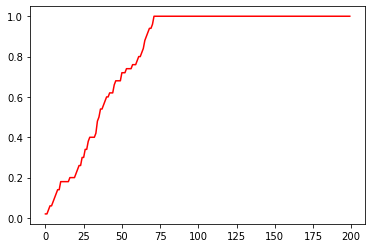

In [3]:
import numpy as np

p_I = 0.1
n_iter = 200

I = set()
S = set(G.nodes())

patient0 = np.random.choice(list(S))

I.add(patient0)
S.remove(patient0)


I_dict = {}
S_dict = {}
for t in range(n_iter):
    for infected_node in list(I):
        neighbors = G.neighbors(infected_node)
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
        I |= infected_neighbors # note to myself:  bitwise-OR operation which is applied to sets
        S -= infected_neighbors
    I_dict[t] = len(I)
    S_dict[t] = len(S)

    
import matplotlib.pyplot as plt


# plot of the fractions - as we assume no individuals leave the system/model:
i_list = np.divide(np.array(list(I_dict.values())), len(G.nodes()))
s_list = np.divide(np.array(list(S_dict.values())), len(G.nodes()))

plt.plot(list(I_dict.keys()),i_list, color='red')
#plt.plot(list(S_dict.keys()),s_list, color='green')
plt.show()

#### Solution to Ex 11.1.5

- First, we define a network of 10 cliques (completely connected comminities) - we specify each clique to include 5 nodes.

- Then we initilize the modeling of a isease. We specify S (susceptible) to be a python set of the node numbers (50 in total).
- Then we randomly select a node. This randomly selected node represents the first infected induvidual (patient0). We add him/her to the empty set and at the same time removes patient0 from the S (the susceptibles) as the SI model specifies the transformation from S to I.
- Afterwards, we initialize a simulation of 200 iterations (time steps representing dt). At each unit time change, we consider the neighbors for each of the infected individuals. For each neighbor for each infected we randomly draw a a number from a [0,1] uniform distribution. If the draw is less than the transmission rate ($\beta$ = 0.1), which it will be in 10% of the draws, then the neighbor is infected and we add the infected to the infected set and remove the individual from the Susceptible set. This is done iteratively for each timestep (0-200).

Furhtermore, it does make sense that all indvidiuals go towards the infected group (from the susceptible) as there is no recovery. This could be a simulation of the spreading of HIV (with a relatively high transmission rate, however)


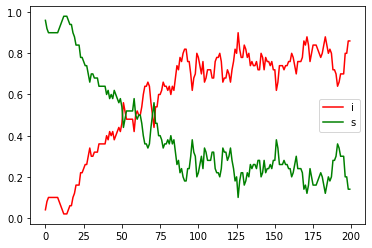

In [5]:
# Adjusting the code such that after T_i = 10, then induviduals start to recover again.

import numpy as np
p_I = 0.1
n_iter = 200
keep_track = [set()] * n_iter # we create 200 sets - we'll story infected people in here for each time period to keep track of how long people have been ill
T_I = 10

I = set()
S = set(G.nodes())

patient0 = np.random.choice(list(S))

I.add(patient0)
keep_track[T_I - 1] = I #as we are indexing from 0, then at time step 10 (here T_I-1  = 9), we add the initial infected that only consist of patient0
S.remove(patient0)


I_dict = {}
S_dict = {}
for t in range(n_iter):
    # We transfer healthy people from I to S from the keep_track list after 10 periods of illness
    I = I - keep_track[t]
    S = S | keep_track[t]
    for infected_node in list(I):
        neighbors = G.neighbors(infected_node)
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
        # The infected_neigbors will recover in 10 time steps, thus we add them 10 time steps from here to the keep_track list:
        # However, as we cannot add sets out of bound - we apply a  "try" instead of adding 10 extra sets
        # Further, we need to take into account that we are in a for loop
        try:
            keep_track[t + T_I] = keep_track[t + T_I] | (infected_neighbors - I)
        except:
            pass
        I |= infected_neighbors # note to myself:  bitwise-OR operation which is applied to sets
        S -= infected_neighbors    
    I_dict[t] = len(I) 
    S_dict[t] = len(S) 


# plot of the fractions - as we assume no individuals leave the system/model:
i_list = np.divide(np.array(list(I_dict.values())), len(G.nodes()))
s_list = np.divide(np.array(list(S_dict.values())), len(G.nodes()))

plt.plot(list(I_dict.keys()),i_list, color='red', label = 'i')
plt.plot(list(S_dict.keys()),s_list, color='green', label = 's')
plt.legend()
plt.show()

We notice that the process is slower and that it coverges towards a fraction lower than 100%

> **Ex. 11.1.6**: Use what you have learned and implement an SIRS model.
* Run it on the Facebook network from last week (so load that into a `networkx.Graph`).
* Record the fraction of infected, susceptiple and recovered over time.
* After the simulation has run, plot these quantities over time and comment on your results
* Be proud of yourself for having solved a really interesting problem.

In [6]:
import collections
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import gzip

# Importing facebook data once again
f = gzip.open('facebook-wall.txt.gz') 

data = pd.read_csv(
    f,
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)
f.close()

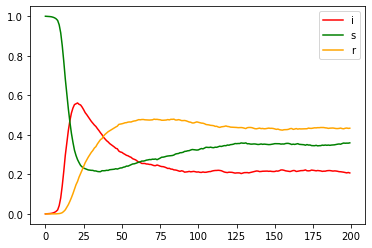

In [9]:
# Simulating a SIRS model - SIRS model on facebook data

# Creating the network from the facebook data
data_sliced = data[:20000]
t0 = data_sliced.timestamp.max() - 86400 * 365
t1 = data_sliced.timestamp.max()    
data = data.loc[data.timestamp.between(t0, t1)]
G_w = nx.from_pandas_edgelist(data, 'user1', 'user2')


p_S = 0.02 # prob of going from immune to susceptible
p_R = 0.04 # prob of recover from being infected
p_I = 0.3 # prob of being infected when susceptible
n_iter = 200 # number of iterations

I = set()
R = set()
S = set(G_w.nodes())

# Cho0se a random individual
patient0 = np.random.choice(list(S))

# We infect patient0 and remove him/her from the susceptible group
I.add(patient0)
S.remove(patient0)

# Define dictionaries for store individuals in the 3 groups, where I apply the time stamp t as key
I_dict = {}
S_dict = {}
R_dict = {}

for t in range(n_iter):
    
    # from S to I
    from_S_to_I_t = set()
    for infected_node in list(I): 
            neighbors = G_w.neighbors(infected_node)
            infected_neighbors = set([n for n in neighbors if np.random.random() < p_I])
            from_S_to_I_t |= infected_neighbors.intersection(S) # Only individuals that are susceptible that can be infected now      
        
    # from I to R:
    from_I_to_R_t = set([n for n in I if np.random.random() < p_R])
    
    # from R to S:
    from_R_to_S_t = set([n for n in R if np.random.random() < p_S])
    
    # Making the adustmets for compartments in timestep t
    I |= from_S_to_I_t
    S |= from_R_to_S_t
    R |= from_I_to_R_t
    I -= from_I_to_R_t
    S -= from_S_to_I_t
    R -= from_R_to_S_t

    # Storing number of individuals in the compartments at time t
    I_dict[t] = len(I)
    S_dict[t] = len(S)
    R_dict[t] = len(R)


# plot of the fractions - as we assume no individuals leave the system/model:
i_list = np.divide(np.array(list(I_dict.values())), len(G_w.nodes()))
s_list = np.divide(np.array(list(S_dict.values())), len(G_w.nodes()))
r_list = np.divide(np.array(list(R_dict.values())), len(G_w.nodes()))

plt.plot(list(I_dict.keys()),i_list, color='red', label = "i")
plt.plot(list(S_dict.keys()),s_list, color='green', label = 's')
plt.plot(list(R_dict.keys()),r_list, color='orange', label = 'r')
plt.legend()
plt.show()

This is very similar to the covid-19 case. We notice exponential growth at first, however, as individuals get immune (at least for some time) the growth in infections slows down and eventually falls. However, as the system is dynamic (individuals go from immune to susceptible once again), the infection rate does not die out. We notice that the system converges towards some long-term levels.

### Further learning

Since the above exercises teaches you how to write down epidemic models (as systems of differential equations)
and subsequently teaches you how to simulate a spreading process on a network to obtain data on infected/susceptible/recovered
over time, you would think it natural that I also taught you how to fit these epidemic models to such data.
This, however, is going a bit too far as this is not a course in computational epidemiology. But if you want to
figure out how to do it, you literally just need to Google search for "fit SIR model".

And finally, a note on how these models are used in the real world. The state-of-the-art in epidemiological modeling is something called "meta popultion models". They are essentially systems of compartmental models. One component in such a model may be a country, and it has its own little SI, SIR or SIRS model. Components are then coupled because there are people moving between them. The paper *The Hidden Geometry of Complex,
Network-Driven Contagion Phenomena* by Dirk Brockmann and Dirk Helbing published in Science in 2013 ([link here](https://www.dropbox.com/s/hxprfyr51fwh907/brockmann13.pdf?dl=0)) sets up such a model for the world using airline traffic as a proxy for people flow between countries. It is a must read if you
are curious about how the pros predict things like when a disease will arrive in a certain place or where a disease originated. I strongly recommend reading it and understanding the figures, it is a stroke of genius.